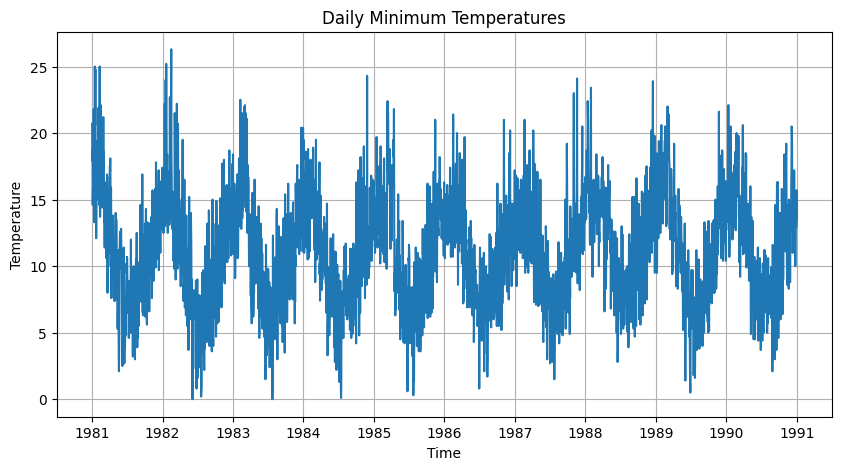

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0432 - val_loss: 0.0077
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - val_loss: 0.0073
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0076
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 - val_loss: 0.0072
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - val_loss: 0.0073
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0093 - val_loss: 0.0071
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089 - val_loss: 0.0072
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - val_loss: 0.0071
Epoch 9/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 10/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090 - val_loss: 0.0070
Epoch 11/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 12/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

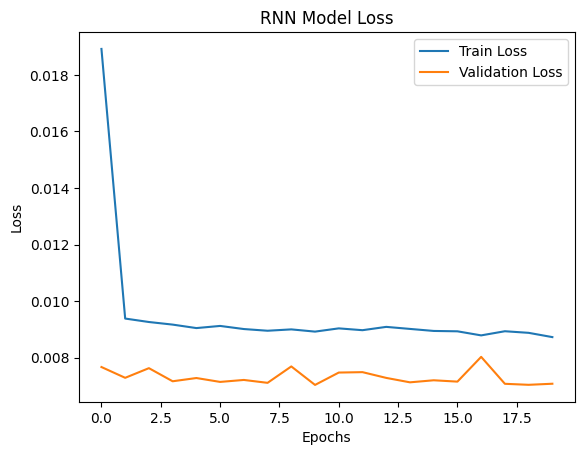

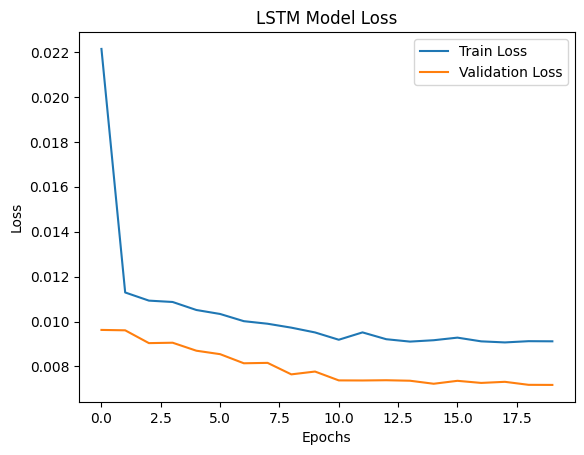

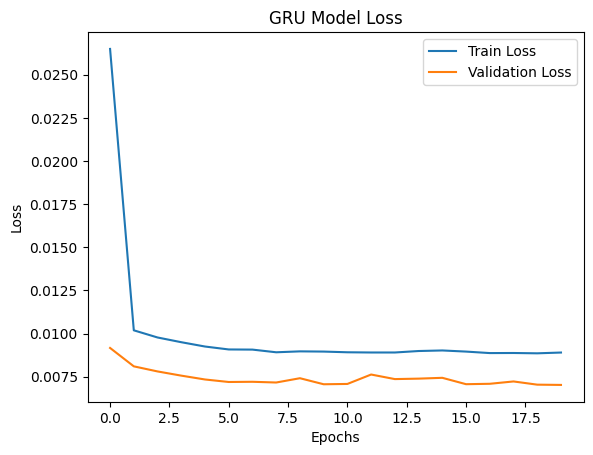

In [1]:
# Part 1 RNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Function to plot the time series
def plot_series(time, series, title):
    plt.figure(figsize=(10, 5))
    plt.plot(time, series)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Temperature")
    plt.grid(True)
    plt.show()

plot_series(df.index, df['Temp'], "Daily Minimum Temperatures")

#data preprocessing
scaler = MinMaxScaler()
df['Temp'] = scaler.fit_transform(df[['Temp']])

# this fucntion sequences for time series prediction
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i: i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(df['Temp'].values, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for RNN input

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


def build_rnn():
    model = Sequential([
        SimpleRNN(50,
                  activation='relu',
                  return_sequences=False,
                  input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

rnn_model = build_rnn()
history_rnn = rnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16)

#Implementing the LSTM and GRU Models
def build_lstm():
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=False, input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = build_lstm()
history_lstm = lstm_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16)

def build_gru():
    model = Sequential([
        GRU(50, activation='relu', return_sequences=False, input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = build_gru()
history_gru = gru_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16)

# comparing model performance
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_rnn, "RNN Model Loss")
plot_loss(history_lstm, "LSTM Model Loss")
plot_loss(history_gru, "GRU Model Loss")

# Answering the questions for task 1:
# The basic RNN that i implemented has an input layer of 10 previous temperature readings.The Recurrent layer had 50 neurons and a ReLU activation function.I chose ReLU because it avoids the vanishing gradient problem that occurs with sigmoid or tanh. The output layer is a dense layer with 1 neuron to predict the next temperature.As for my activation functions,for the recurrent layer i used ReLU and no activation function for the output because we are predicting continuous values. The metric that i will use to measure the performance of my model will be mean squared error because it is a regression task.


# differences between RNN,LSTM and GRU

# Basic RNN has fast training but struggles with long-term dependencies. Performance wise it has moderate loss,but worse than LSTM & GRU for longer sequences.RNN suffers from the vanishing gradient problem, meaning it has trouble learning long-term dependencies.

#Uses memory cells and gates to control information flow. Has better performance than RNN because it retains information over longer sequences. It has slower training than RNN but results in lower validation loss.LSTM can learn long-term dependencies and avoid vanishing gradients.

# Gru is a  simpler version of LSTM with only 2 gates (reset and update gates).It has similar performance to LSTM but trains faster since it has fewer parameters.GRU combines input and forget gates, making it computationally efficient while still learning long-term dependencies.


# A traditional feedforward neural network (FNN) is would not be used for time-series prediction because Time-series data has sequential dependencies, but FNN treats each input independently.Feedforward networks do not maintain memory, making it hard to capture trends over time.

[==------------------------------------------------] 5.5% 91.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 8.7% 145.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.6% 259.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.4% 289.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.3% 321.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.1% 351.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.7% 526.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.5% 556.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.3% 1002.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.9% 1395.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.3% 1451.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 92.0% 1530.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.9% 1560.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.9% 1595.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.7% 1641.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec Model Loaded Successfully!
{('cat', 'dog'): 0.76094574, ('king', 'queen'): 0.6510957, ('apple', 'orange'): 0.39203465, ('car', 'bicycle'): 0.5364485, ('book', 'pen'): 0.2822021}
{('cat', 'dog'): 2.0815337, ('king', 'queen'): 2.4796925, ('apple', 'orange'): 3.3181262, ('car', 'bicycle'): 2.7047768, ('book', 'pen'): 3.3038652}


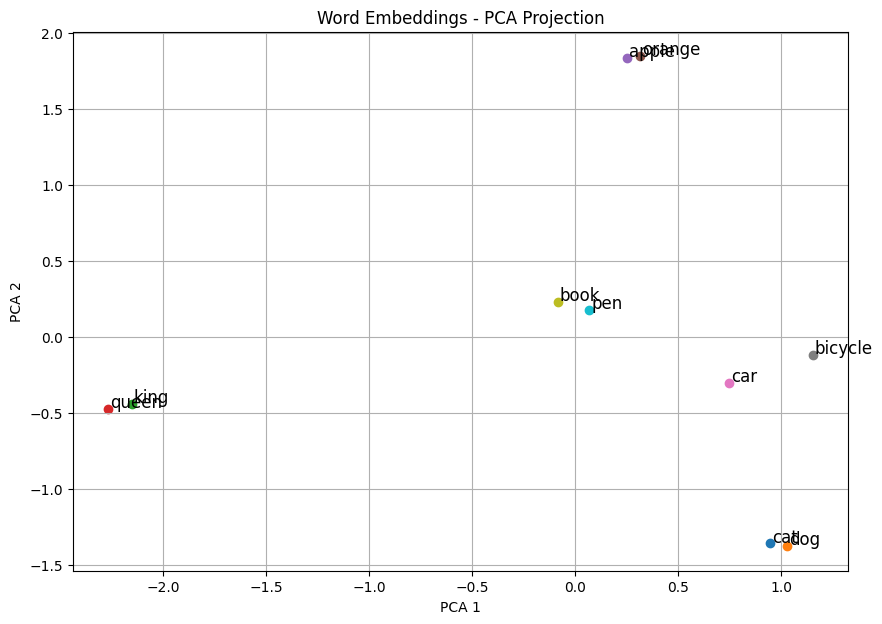

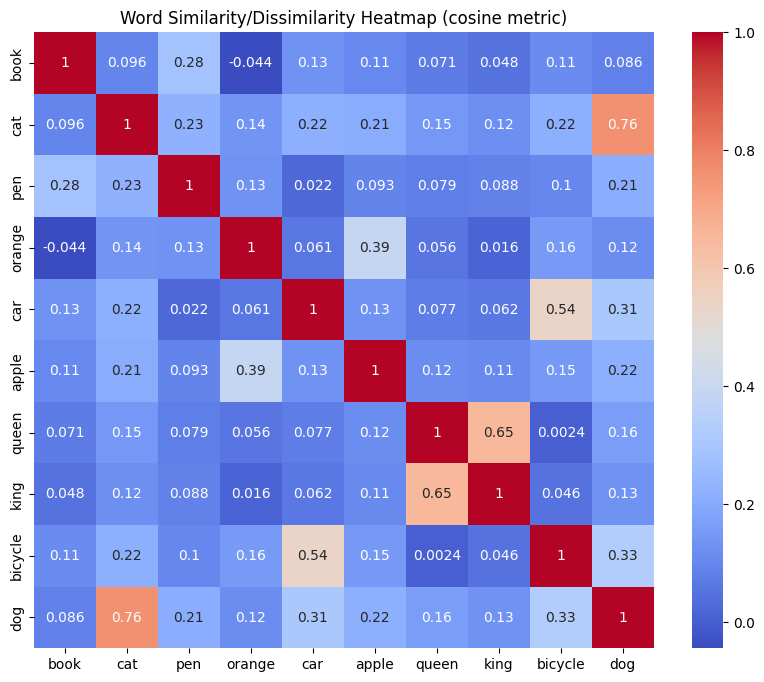

In [3]:
# Task 3
# Implementing Word Embeddings
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import seaborn as sns

# I decided to use the pre-trained Word2Vec Model
# Load Pre-trained Word2Vec Model
model = api.load("word2vec-google-news-300")
print("Word2Vec Model Loaded Successfully!")

# Function to get word embeddings
def get_embedding(word):
    if word in model:
        return model[word]
    else:
        print(f"'{word}' not found in vocabulary. Using approximate methods.")
        return np.zeros(300)

# Function to compute the cosine similarity:
def compute_cosine_similarity(word1, word2):
    emb1, emb2 = get_embedding(word1), get_embedding(word2)
    return cosine_similarity([emb1], [emb2])[0][0]

# Function to compute the  Euclidean distance:
def compute_euclidean_distance(word1, word2):
    emb1, emb2 = get_embedding(word1), get_embedding(word2)
    return euclidean_distances([emb1], [emb2])[0][0]

# Batch processing for multiple word pairs
def batch_similarity(word_pairs, metric='cosine'):
    results = {}
    for w1, w2 in word_pairs:
        if metric == 'cosine':
            results[(w1, w2)] = compute_cosine_similarity(w1, w2)
        elif metric == 'euclidean':
            results[(w1, w2)] = compute_euclidean_distance(w1, w2)
    return results

# Visualization: PCA Scatter Plot
def plot_embeddings(word_list):
    embeddings = np.array([get_embedding(word) for word in word_list])
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 7))

    for i, word in enumerate(word_list):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word, fontsize=12)
    plt.title("Word Embeddings - PCA Projection")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid()
    plt.show()

# Heatmap for Similarity/Dissimilarity
def plot_heatmap(word_pairs, metric='cosine'):
    words = list(set([w for pair in word_pairs for w in pair]))
    sim_matrix = np.zeros((len(words), len(words)))

    for i, w1 in enumerate(words):
        for j, w2 in enumerate(words):
            if metric == 'cosine':
                sim_matrix[i, j] = compute_cosine_similarity(w1, w2)
            elif metric == 'euclidean':
                sim_matrix[i, j] = compute_euclidean_distance(w1, w2)

    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_matrix, xticklabels=words, yticklabels=words, annot=True, cmap="coolwarm")
    plt.title(f"Word Similarity/Dissimilarity Heatmap ({metric} metric)")
    plt.show()


word_pairs = [("cat", "dog"), ("king", "queen"), ("apple", "orange"), ("car", "bicycle"), ("book", "pen")]
print(batch_similarity(word_pairs, metric='cosine'))
print(batch_similarity(word_pairs, metric='euclidean'))

plot_embeddings(["cat", "dog", "king", "queen", "apple", "orange", "car", "bicycle", "book", "pen"])
plot_heatmap(word_pairs, metric='cosine')

# Answering Task 3 Questions:

# Cosine similarity is widely used in word embedding spaces because it effectively measures the semantic similarity between words, regardless of their magnitude in the vector space.Words that are semantically similar (e.g., "cat" and "dog") tend to have high cosine similarity.Words with opposite meanings (e.g., "hot" and "cold") tend to have low or negative cosine similarity.

#I used euclidean distance as a dissimilarity metric becuase euclidean distance is a measure of dissimilarity in a high dimensional space like in word embeddings.Cosine similarity measures directional similarity, Euclidean distance measures absolute separation between word vectors.

# my method measures novelty s novelty/diversity better than the cosine similarity because cosine similarity, which only measures direction, Euclidean distance measures absolute spread. This makes it useful for detecting truly unrelated words, identifying words that are novel or different in context and capturing shifts in meaning better than just angular simularity.


{('cat', 'dog'): 0.76094574, ('king', 'queen'): 0.6510957, ('apple', 'orange'): 0.39203465, ('car', 'bicycle'): 0.5364485, ('book', 'pen'): 0.2822021}
{('cat', 'dog'): 2.0815337, ('king', 'queen'): 2.4796925, ('apple', 'orange'): 3.3181262, ('car', 'bicycle'): 2.7047768, ('book', 'pen'): 3.3038652}


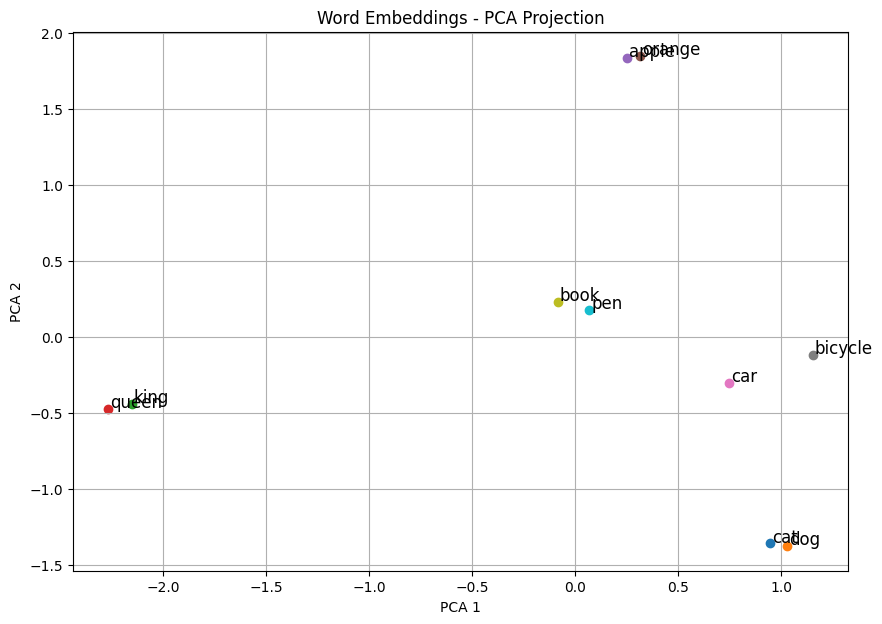

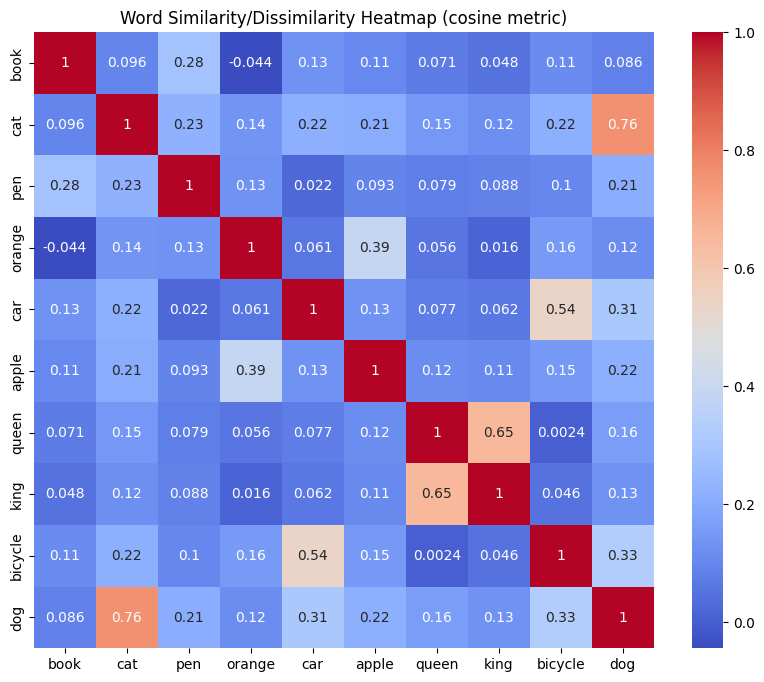

In [6]:
# Code to allow users to toggle around different similarity/dissimilarity measures via function parameters.
word_pairs = [("cat", "dog"), ("king", "queen"), ("apple", "orange"), ("car", "bicycle"), ("book", "pen")]
print(batch_similarity(word_pairs, metric='cosine'))
print(batch_similarity(word_pairs, metric='euclidean'))

plot_embeddings(["cat", "dog", "king", "queen", "apple", "orange", "car", "bicycle", "book", "pen"])
plot_heatmap(word_pairs, metric='cosine')